## **◆データサイエンス第一回効果測定 問3**

以下の運動能力のデータの内容を確認し、学習の前処理を行いましょう。
以下ノートブック、問題用紙の指示に従い、実行結果と同じになるように、各セルにプログラムを実装してください。

準備：ライブラリのインポート

In [21]:
# ライブラリのインポート
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# ①：3-運動能力.csvを読み込み、dfという名前のデータフレームに格納する
df = pd.read_csv("3-運動能力.csv", encoding = "shiftjis")

# ②：データフレームの先頭から5行を表示する
df.head()

,ID,逆手懸垂回数,上体起こし回数,ジャンプ,体重,腹囲,心拍数
0,1000000,1,1.0,1,1.00,1.00,60.0
1,1000001,5,162.0,60,61.30,73.52,60.0
2,1000002,2,110.0,60,85.90,93.98,52.0
3,1000003,12,101.0,101,75.00,85.07,58.0
4,1000004,19,105.0,37,73.46,88.90,62.0


In [22]:
# ③読み込んだデータの1行目を削除し、再びdfに格納する
df = df.drop(df.index[0])

df.head(5)

,ID,逆手懸垂回数,上体起こし回数,ジャンプ,体重,腹囲,心拍数
1,1000001,5,162.0,60,61.30,73.52,60.0
2,1000002,2,110.0,60,85.90,93.98,52.0
3,1000003,12,101.0,101,75.00,85.07,58.0
4,1000004,19,105.0,37,73.46,88.90,62.0
5,1000005,13,155.0,58,85.71,NaN,NaN


In [23]:
# ④DataFrameの列ごとに、欠損値があるか確認(列ごとに欠損値の個数をカウント)
print(df.isnull().sum())

ID         0
逆手懸垂回数     0
上体起こし回数    1
ジャンプ       0
体重         0
腹囲         2
心拍数        5
dtype: int64


In [24]:
# ⑤腹囲列の内容を確認するため、printで腹囲列だけを表示する
print(df.loc[:, "腹囲"])

1      73.52
2      93.98
3      85.07
4      88.90
5        NaN
6      91.44
7      96.52
8      86.36
9      91.40
10     83.82
11     72.30
12      1.00
13     77.36
14    130.80
15    100.10
16     93.98
17     90.10
18     81.28
19       NaN
20     68.20
Name: 腹囲, dtype: float64


In [25]:
# ⑥腹囲列の欠損値を、一つ前のデータで補完する
df["腹囲"] = df["腹囲"].fillna(method='ffill')

df

,ID,逆手懸垂回数,上体起こし回数,ジャンプ,体重,腹囲,心拍数
1,1000001,5,162.0,60,61.30,73.52,60.0
2,1000002,2,110.0,60,85.90,93.98,52.0
3,1000003,12,101.0,101,75.00,85.07,58.0
4,1000004,19,105.0,37,73.46,88.90,62.0
5,1000005,13,155.0,58,85.71,88.90,NaN
6,1000006,4,101.0,42,82.50,91.44,56.0
7,1000007,8,101.0,38,95.69,96.52,56.0
8,1000008,6,125.0,40,75.73,86.36,60.0
9,1000009,15,200.0,40,79.80,91.40,NaN
10,1000010,17,251.0,250,69.80,83.82,56.0


In [26]:
# ⑦心拍数列の欠損値を、中央値で補完する
df = df.fillna(df.median())

df

,ID,逆手懸垂回数,上体起こし回数,ジャンプ,体重,腹囲,心拍数
1,1000001,5,162.0,60,61.30,73.52,60.0
2,1000002,2,110.0,60,85.90,93.98,52.0
3,1000003,12,101.0,101,75.00,85.07,58.0
4,1000004,19,105.0,37,73.46,88.90,62.0
5,1000005,13,155.0,58,85.71,88.90,56.0
6,1000006,4,101.0,42,82.50,91.44,56.0
7,1000007,8,101.0,38,95.69,96.52,56.0
8,1000008,6,125.0,40,75.73,86.36,60.0
9,1000009,15,200.0,40,79.80,91.40,56.0
10,1000010,17,251.0,250,69.80,83.82,56.0


In [27]:
!pip install japanize-matplotlib

In [28]:
import japanize_matplotlib

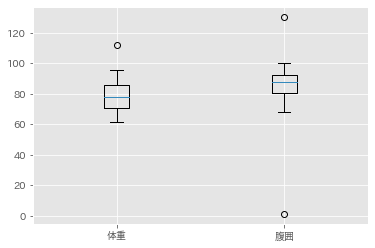

In [29]:
# ⑧体重、腹囲列の箱ひげ図を描画する
# グリッドが表示されるように表示を整えること。
# 出力例とグラフのスタイルが異なっても問題ない。

import matplotlib.style

matplotlib.style.use('ggplot')

kgdf = df.loc[:, "体重"]

cmdf = df.loc[:, "腹囲"]

fig, ax = plt.subplots()

labels = ["体重", "腹囲"]

ax.boxplot((kgdf, cmdf),labels=labels)

plt.show()

⑧出力例

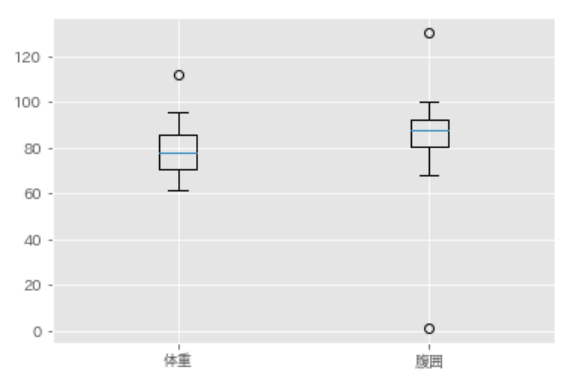

In [30]:
# ⑨各列の相関を調べるために、相関マトリックスを作成
# 相関マトリクスに表示するデータから、ID列を除くこと
df1 = df.drop("ID", axis = 1)
df1.corr()

,逆手懸垂回数,上体起こし回数,ジャンプ,体重,腹囲,心拍数
逆手懸垂回数,1.000000,0.643319,0.481859,-0.292556,-0.281194,0.131390
上体起こし回数,0.643319,1.000000,0.612116,-0.433444,-0.484856,0.040481
ジャンプ,0.481859,0.612116,1.000000,-0.177877,-0.247553,0.003944
体重,-0.292556,-0.433444,-0.177877,1.000000,0.574956,-0.513428
腹囲,-0.281194,-0.484856,-0.247553,0.574956,1.000000,-0.089736
心拍数,0.131390,0.040481,0.003944,-0.513428,-0.089736,1.000000


In [31]:
# もう一つのファイルをdf2に格納
df2 = pd.read_csv('3-名前.csv')
df2.head()

,ID,name,birthplace
0,1000001,Devi,Bengalulu
1,1000002,Singh,Chennai
2,1000003,Kumar,Delhi
3,1000004,Das,Agra
4,1000005,Ram,Chennai


In [32]:
# ⑩IDを結合キーとして、dfとdf2を内部結合し、df3 に格納する
df3 = pd.merge(df, df2, on = "ID")
df3.head()

,ID,逆手懸垂回数,上体起こし回数,ジャンプ,体重,腹囲,心拍数,name,birthplace
0,1000001,5,162.0,60,61.30,73.52,60.0,Devi,Bengalulu
1,1000002,2,110.0,60,85.90,93.98,52.0,Singh,Chennai
2,1000003,12,101.0,101,75.00,85.07,58.0,Kumar,Delhi
3,1000004,19,105.0,37,73.46,88.90,62.0,Das,Agra
4,1000005,13,155.0,58,85.71,88.90,56.0,Ram,Chennai


In [33]:
# 11 体重が90以上の列を表示
df4 = df3[df3["体重"] >= 90]
df4

,ID,逆手懸垂回数,上体起こし回数,ジャンプ,体重,腹囲,心拍数,name,birthplace
6,1000007,8,101.0,38,95.69,96.52,56.0,Lalihi,Jaipur
13,1000014,1,50.0,50,112.00,130.80,50.0,Ray,Mubai
15,1000016,12,120.0,120,91.60,93.98,62.0,Ghosh,Chennai


In [16]:
# 12 体重列で降順ソートし表示する
df.sort_values("体重", ascending=False)

,ID,逆手懸垂回数,上体起こし回数,ジャンプ,体重,腹囲,心拍数
14,1000014,1,50.0,50,112.00,130.80,50.0
7,1000007,8,101.0,38,95.69,96.52,56.0
16,1000016,12,120.0,120,91.60,93.98,62.0
15,1000015,6,70.0,31,87.50,100.10,56.0
2,1000002,2,110.0,60,85.90,93.98,52.0
5,1000005,13,155.0,58,85.71,88.90,56.0
18,1000018,11,230.0,80,85.00,81.28,56.0
6,1000006,4,101.0,42,82.50,91.44,56.0
17,1000017,4,60.0,25,79.81,90.10,54.0
9,1000009,15,200.0,40,79.80,91.40,56.0
